In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics

In [319]:
# https://gist.github.com/rogerallen/1583593
us_state_abbrev={'Alabama':'AL','Alaska':'AK','American Samoa':'AS','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut':'CT','Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA','Guam':'GU','Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND','Northern Mariana Islands':'MP','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Puerto Rico':'PR','Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virgin Islands':'VI','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [79]:
df = pd.read_excel('output2.xlsx')
df.head()

,index,geo_value,signal,time_value,issue,lag,smoothed_wcli_value,smoothed_wcli_stderr,smoothed_wcli_sample_size,geo_type,...,smoothed_wworried_become_ill_value,smoothed_wworried_become_ill_stderr,smoothed_wworried_become_ill_sample_size,smoothed_wworried_finances_value,smoothed_wworried_finances_stderr,smoothed_wworried_finances_sample_size,confirmed_7dav_cumulative_prop_value,confirmed_7dav_incidence_prop_value,deaths_7dav_incidence_prop_value,confirmed_incidence_prop_value
0,ak2020-04-06,ak,smoothed_wcli,2020-04-06,2020-09-03,150.0,1.502092,0.700182,412.0,state,...,NaN,NaN,NaN,NaN,NaN,NaN,22.399482,1.461695,0.059258,0.829610
1,ak2020-04-07,ak,smoothed_wcli,2020-04-07,2020-09-03,149.0,1.209285,0.385696,1258.0,state,...,NaN,NaN,NaN,NaN,NaN,NaN,24.098208,1.698726,0.059258,3.041905
2,ak2020-04-08,ak,smoothed_wcli,2020-04-08,2020-09-03,148.0,1.130105,0.281751,1934.0,state,...,NaN,NaN,NaN,NaN,NaN,NaN,25.796935,1.698726,0.079011,1.797489
3,ak2020-04-09,ak,smoothed_wcli,2020-04-09,2020-09-03,147.0,0.935932,0.213790,2447.0,state,...,NaN,NaN,NaN,NaN,NaN,NaN,27.535166,1.738231,0.079011,1.382684
4,ak2020-04-10,ak,smoothed_wcli,2020-04-10,2020-09-03,146.0,0.829453,0.187829,2685.0,state,...,NaN,NaN,NaN,NaN,NaN,NaN,29.273398,1.738231,0.079011,1.520953


In [343]:
cols = [c.replace('smoothed_w', '').replace('smoothed_', '').replace('_value', '') for c in df.columns]
df.set_axis(cols, axis=1, inplace=True)

df['nomask'] = 100 - df['wearing_mask']
df['avg_avoid_contact'] = 100 - df[['travel_outside_state_5d','work_outside_home_1d','spent_time_1d','large_event_1d','public_transit_1d']].mean(axis=1)


Separate by state

In [382]:
df_bystate = {}
geo_values = df['geo'].unique()
for val in geo_values:
    df_bystate[val] = df.loc[df['geo'] == val]
    df_bystate[val].set_index('time', inplace=True)
df_bystate['md'].head()

,index,geo,signal,issue,lag,cli,cli_stderr,cli_sample_size,geo_type,data_source,...,worried_finances,worried_finances_stderr,worried_finances_sample_size,confirmed_7dav_cumulative_prop,confirmed_7dav_incidence_prop,deaths_7dav_incidence_prop,confirmed_incidence_prop,nomask,avg_avoid_contact,avg_outside_contact
time,,,,,,,,,,,,,,,,,,,,,
2020-04-06,md2020-04-06,md,smoothed_wcli,2020-09-03,150.0,0.407821,0.120294,2089.9838,state,fb-survey,...,NaN,NaN,NaN,46.129751,6.219317,0.179585,7.079435,NaN,94.764861,5.235139
2020-04-07,md2020-04-07,md,smoothed_wcli,2020-09-03,149.0,0.566812,0.086505,8232.9649,state,fb-survey,...,NaN,NaN,NaN,52.535742,6.405991,0.200852,5.392280,NaN,95.004214,4.995786
2020-04-08,md2020-04-08,md,smoothed_wcli,2020-09-03,148.0,0.580379,0.067400,14004.9536,state,fb-survey,...,NaN,NaN,NaN,60.907718,8.371976,0.219755,19.154173,NaN,94.844373,5.155627
2020-04-09,md2020-04-09,md,smoothed_wcli,2020-09-03,147.0,0.589952,0.079155,18756.9435,state,fb-survey,...,NaN,NaN,NaN,70.014575,9.106857,0.241022,10.850723,NaN,94.918334,5.081666
2020-04-10,md2020-04-10,md,smoothed_wcli,2020-09-03,146.0,0.619470,0.092771,21133.9425,state,fb-survey,...,NaN,NaN,NaN,79.962646,9.948072,0.302459,12.951397,NaN,94.896740,5.103260


Try to predict 'confirmed_7dav_incidence_prop_value' for MD

In [478]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, LinearSVR

predictors = [
    'hh_cmnty_cli',
    'wearing_mask',
    'travel_outside_state_5d',
    'work_outside_home_1d',
    'spent_time_1d',
    'large_event_1d',
    'public_transit_1d',
    'avg_avoid_contact',
    'anxious_5d',
    'depressed_5d',
    'felt_isolated_5d',
    'worried_become_ill',
    'worried_finances'
]
response = 'confirmed_incidence_prop'


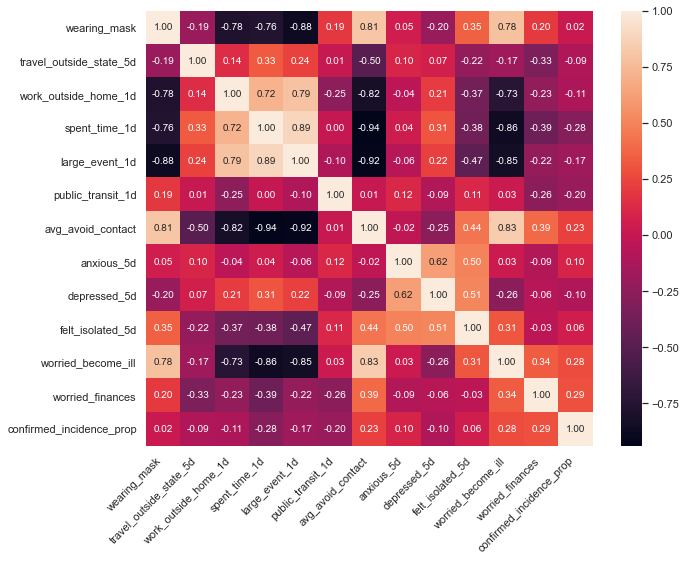

In [472]:
t = df[predictors + [response]].dropna()

cols = [c.replace('smoothed_w', '').replace('smoothed_', '').replace('_value', '') for c in t.columns]
t.set_axis(cols, axis=1, inplace=True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax = sns.heatmap(t.corr(), annot=True, fmt='.2f', annot_kws={"fontsize":10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

LR: 0.4548865583081086, 0.0928773855764658
Lasso: 0.4564796718792645, 0.09164725945048165
KNN: 0.3063205098588754, 0.14887121039338888
SVR: 0.4595797459626965, 0.0855239256537075


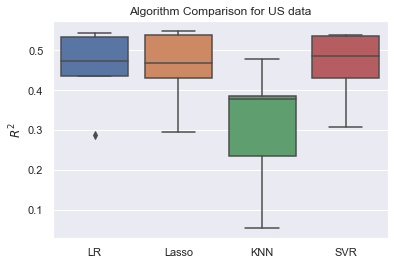

In [479]:
t = df
X_train = t[predictors]
X_train = X_train.dropna() # Drop all rows before Sep 8th
y_train = t[response].loc[X_train.index]

models = [
    ('LR', LinearRegression()),
    ('Lasso', Lasso(alpha=1)),
    ('KNN', KNeighborsRegressor()),
    ('SVR', LinearSVR(epsilon=0, max_iter=100000, C=2)),
    # ('RF', RandomForestRegressor(n_estimators=10))
]

results = []
names = []
for name, model in models:
    ts_cv = TimeSeriesSplit(n_splits = 10)
    cv_results = cross_val_score(model, X_train, y_train, cv=ts_cv, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()}, {cv_results.std()}')

temp = pd.DataFrame(columns=['name', 'result'])
for name, res in zip(names, results):
    for item in res:
        temp = temp.append({'name': name, 'result': item}, ignore_index=True)

ax = sns.boxplot(x='name', y='result', data=temp)
ax.set_title("Algorithm Comparison for US data")
ax.set_ylabel('$R^2$')
ax.set_xlabel('')
plt.show()

linear: 0.45939344510410474, 0.08488533382751279
poly: 0.46530895200677425, 0.08425803472980331
rbf: 0.43395259051425317, 0.09452925521290205
sigmoid: -0.06680582268267862, 0.06858407467018952


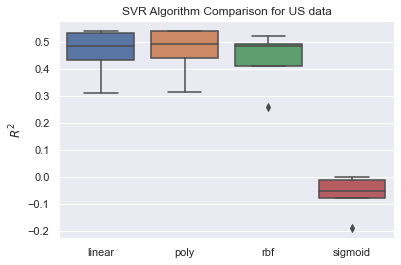

In [436]:
# SVR Model Comparison
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = []
names = []
for kern in kernels:
    ts_cv = TimeSeriesSplit(n_splits = 5)
    cv_results = cross_val_score(SVR(kernel=kern, C=2), X_train, y_train, cv=ts_cv, scoring='r2')
    
    results.append(cv_results)
    names.append(kern)
    print(f'{kern}: {cv_results.mean()}, {cv_results.std()}')

temp = pd.DataFrame(columns=['name', 'result'])
for name, res in zip(names, results):
    for item in res:
        temp = temp.append({'name': name, 'result': item}, ignore_index=True)

ax = sns.boxplot(x='name', y='result', data=temp)
ax.set_title("SVR Algorithm Comparison for US data")
ax.set_ylabel('$R^2$')
ax.set_xlabel('')
plt.show()

In [408]:
C_arr = np.linspace(0.1, 2, 100)

results = {}
for c in C_arr:
    ts_cv = TimeSeriesSplit(n_splits = 5)
    cv_results = cross_val_score(LinearSVR(epsilon=0.1, max_iter=100000, C=c), X_train, y_train, cv=ts_cv, scoring='r2')
    
    results[str(c)] = cv_results.mean()

print(max(results, key=results.get))

1.9424242424242424


In [406]:
# SVR with Linear kernel coefs
svr = LinearSVR(epsilon=0.1, max_iter=100000)
svr.fit(X_train, y_train)
svr.coef_

array([-2.64327414,  0.3950338 , -0.08141237, -0.91506972,  0.2611757 ,
       -1.70352536,  1.34418888,  3.79882299, -3.21112274, -0.17358931,
        1.80103149,  1.34407663])

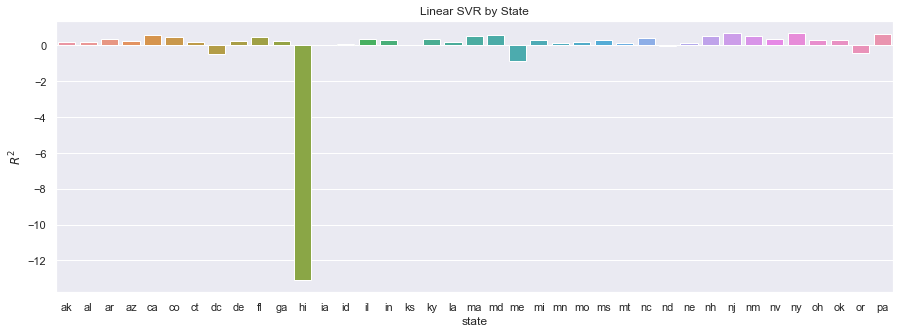

In [443]:
# Test model on each state
results = []
labels = []
for state in df_bystate.keys():
    t = df_bystate[state]
    X_test = t[predictors]
    X_test = X_test.dropna()

    # if len(X_test) == 0:
        break

    y_test = t[response].loc[X_test.index]

    labels.append(state)
    results.append(svr.score(X_test, y_test))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax = sns.barplot(labels, results)
ax.set_ylabel('$R^2$')
ax.set_xlabel('state')
ax.set_title('Linear SVR by State')
plt.show()

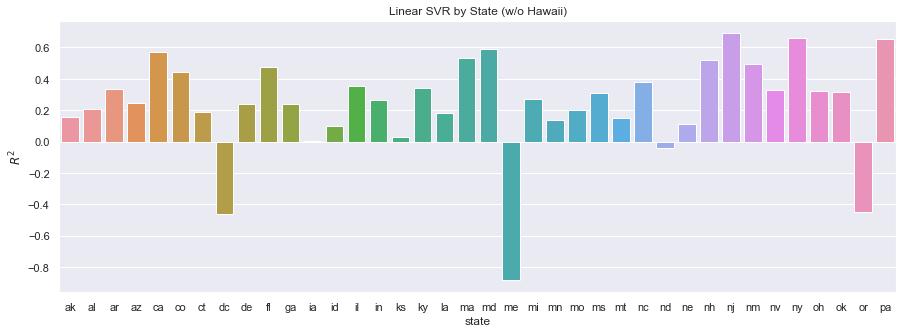

In [445]:
hi_ind = labels.index('hi')
labels.pop(hi_ind)
results.pop(hi_ind)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax = sns.barplot(labels, results)
ax.set_ylabel('$R^2$')
ax.set_xlabel('state')
ax.set_title('Linear SVR by State (w/o Hawaii)')
plt.show()

wearing_mask: -2.896136423934099
travel_outside_state_5d: -0.0022051617725634257
work_outside_home_1d: -0.0
spent_time_1d: -1.1297475733224647
large_event_1d: -0.45623082063802106
public_transit_1d: -2.260682209916188
avg_avoid_contact: 0.23426029061803227
anxious_5d: 3.849967343501698
depressed_5d: -3.2095448178194697
felt_isolated_5d: 0.0
worried_become_ill: 2.003718707571548
worried_finances: 1.1918602370026692


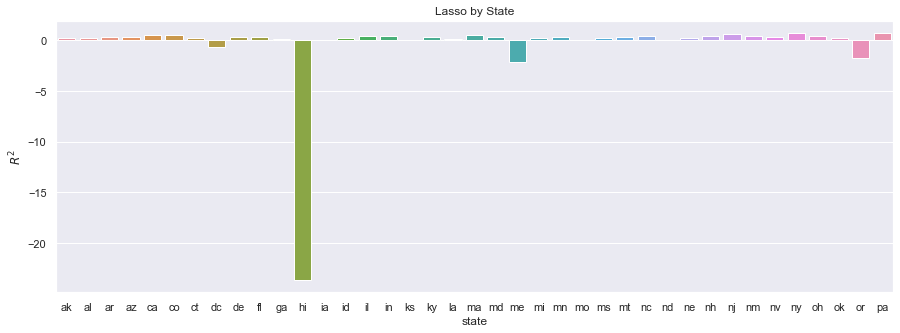

In [474]:
# Lasso model on US data
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
for name, coef in zip(X_train.columns, lasso.coef_):
    print(f"{name}: {coef}")

# Test model on each state
results = []
labels = []
for state in df_bystate.keys():
    t = df_bystate[state]
    X_test = t[predictors]
    X_test = X_test.dropna()

    if len(X_test) == 0:
        break

    y_test = t[response].loc[X_test.index]

    labels.append(state)
    results.append(lasso.score(X_test, y_test))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax = sns.barplot(labels, results)
ax.set_ylabel('$R^2$')
ax.set_xlabel('state')
ax.set_title('Lasso by State')
plt.show()

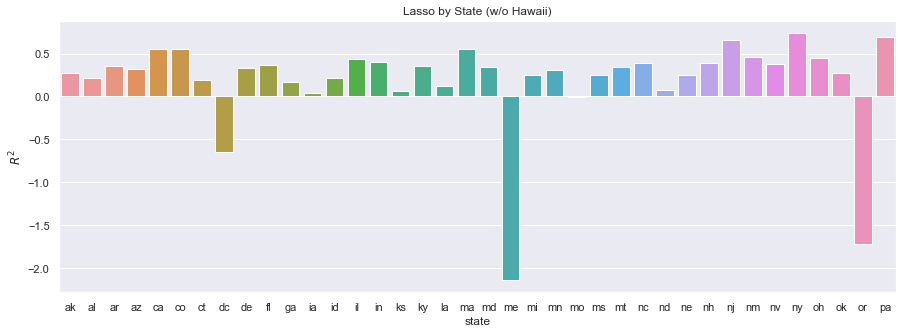

In [476]:
# hi_ind = labels.index('hi')
# labels.pop(hi_ind)
# results.pop(hi_ind)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax = sns.barplot(labels, results)
ax.set_ylabel('$R^2$')
ax.set_xlabel('state')
ax.set_title('Lasso by State (w/o Hawaii)')
plt.show()

In [383]:
def models_by_state(state, predictors=predictors, response=response):
    t = df_bystate[state]
    X_train = t[predictors]
    X_train = X_train.dropna() # Drop all rows before Sep 8th
    y_train = t[response].loc[X_train.index]

    models = [
        ('LR', LinearRegression()),
        ('Lasso', Lasso()),
        ('KNN', KNeighborsRegressor()),
        ('SVR', SVR(kernel='linear', gamma='scale'))
    ]

    results = []
    names = []
    for name, model in models:
        ts_cv = TimeSeriesSplit(n_splits = 5)
        cv_results = cross_val_score(model, X_train, y_train, cv=ts_cv, scoring='r2')
        
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()}, {cv_results.std()}')

    plt.boxplot(results, labels=names)
    plt.title("Algorithm Comparison")
    plt.show()

LR: -6.7216767775455555, 12.226573785973791
Lasso: -0.4131569155341618, 0.5796242390644177
KNN: -0.9506655470907255, 0.5745146448645893
SVR: -0.40352850350140257, 0.35755942408177044


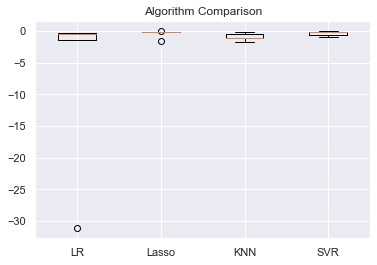

In [384]:
models_by_state('tx')

LR: -3.105342104806339, 4.689097792315824
Lasso: -3.0799827342367627, 3.0508410279484015
KNN: -4.71367445127889, 6.214361667216975
SVR: -3.2735348666922675, 4.116976930749172


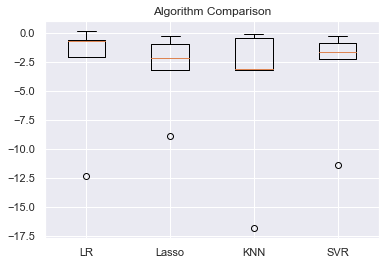

In [385]:
models_by_state('ca')

LR: -3.5942618399686523, 2.9827696006597906
Lasso: -3.4429715513943577, 3.8721264600064207
KNN: -3.170324274505176, 2.643969820129228
SVR: -2.9170762304994087, 2.8886717045199006


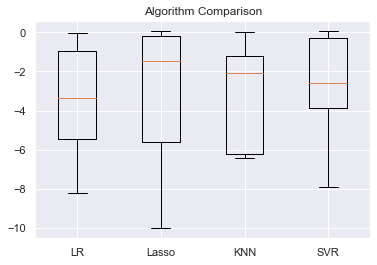

In [386]:
models_by_state('md')

In [446]:
def plot_cmat_state(state):
    t = df_bystate[state][predictors + [response]].dropna()

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1,1,1)
    ax = sns.heatmap(t.corr())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title("Correlation Matrix for " + abbrev_us_state[state.upper()])
    plt.show()

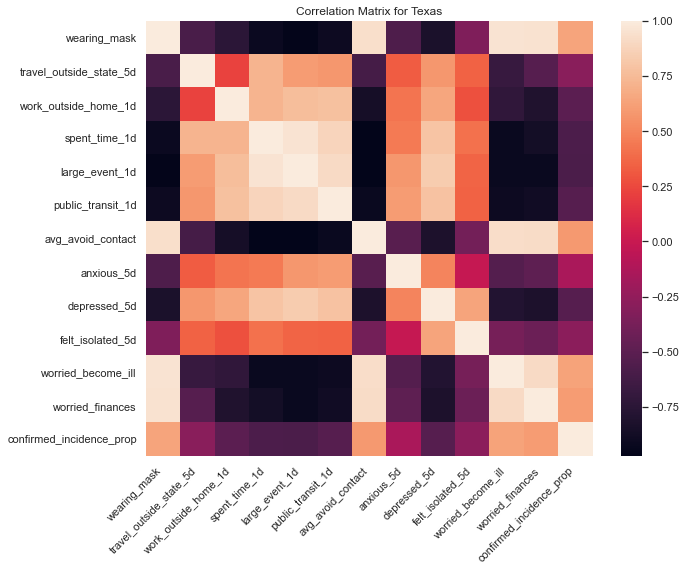

In [447]:
plot_cmat_state('tx')

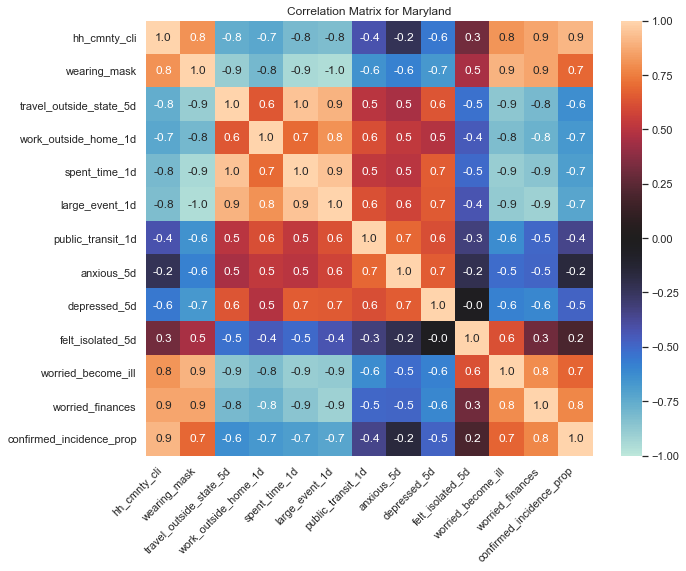

In [329]:
plot_cmat_state('md')